<a href="https://colab.research.google.com/github/Marcos9971/Controle/blob/main/Pratica_5_Ziegler_Nichols.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 5.1 MB/s eta 0:00:00


MFscomp(s) = 
          30
----------------------
s^3 + 6 s^2 + 5 s + 30

MFcompP(s) = 
          30
----------------------
s^3 + 6 s^2 + 5 s + 30

MFcompPID(s) = 
           319.8 s^2 + 227.6 s + 18
----------------------------------------------
12.64 s^4 + 75.87 s^3 + 383 s^2 + 227.6 s + 18



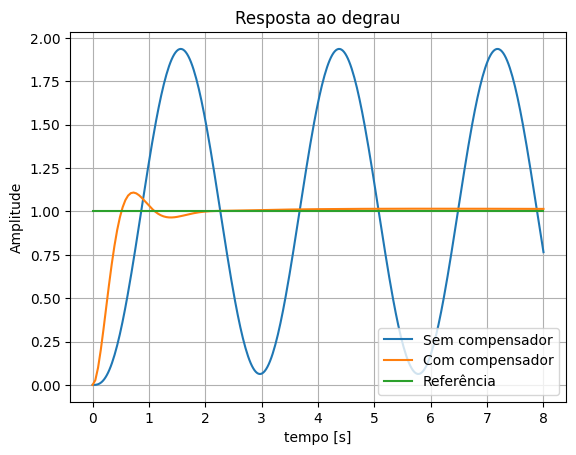

In [2]:
#Ziegler-Nichols para plantas de ordem maiores ou iguais a 2

import matplotlib.pyplot as plt
import numpy as np
import control

s = control.tf('s')

#Parâmetros obtidos pelo segundo método de Ziegler-Nichols para
#a planta 1/(s*(s+1)*(s+5))
Kcr = 1
Pcr = 2.81

#PID
Kp = 0.6*Kcr
Ti = 0.5*Pcr*9
Td = 0.125*Pcr*4

Gc = Kp*(1+1/(Ti*s)+Td*s)

#planta
G = 30/(s**3+6*s**2+5*s)

#Malha fechada sem o compensador
MFscompP = control.feedback(G)

#Malha Fechada com Kcr
MFcompP = control.feedback(G*Kcr)

#Malha Fechada com PID
MFcompPID = control.feedback(G*Gc)

#Funções de transferência
print('MFscomp(s) =',MFscompP)
print('MFcompP(s) =', MFcompP)
print('MFcompPID(s) =', MFcompPID)

#Resposta ao degrau unitário
plt.figure(1)
t,y = control.step_response(MFcompPID, 8)
tref, yref = control.step_response(s/s,8)
t1,y1 = control.step_response(MFscompP,8)
plt.plot(t1,y1,t,y,tref,yref)
plt.title('Resposta ao degrau')
plt.xlabel('tempo [s]')
plt.ylabel('Amplitude')
plt.legend(["Sem compensador","Com compensador","Referência"])
plt.grid(True)



In [3]:
#Achando o tempo de subida, tempo de acomodação, sobressinal e etc.
#s =control.step_info(H)
#print(s)


# calculo do tempo de pico
peak_time=t[np.argmax(y)]
#print(peak_time)

#calculo do sobressinal
Overshoot=(y.max()/y[-1]-1)*100
#print(Overshoot)

#calculo do tempo de subida
for i in range(0,len(y)-1):
  if (y[i]>y[-1]*.10):
    i_10=i
    break
for i in range(0,len(y)-1):
  if (y[i]>y[-1]*.90):
    i_90=i
    break
Rise_Time=(t[i_90]-t[i_10])
#print(Rise_Time)


#calculo do tempo de acomodação

for i in range(2,len(y)-1):
  if(abs(y[-i]/y[-1])>1.02) or (abs(y[-i]/y[-1])<0.98):
    qts=i+1
    break
Settling_Time=(t[len(y)-qts])
#print(Settling_Time)


#interface do programa com usuario
print("-------------------------------------------------")
print("Característica de malha fechada com o compensador")
print("Tempo de pico: ",peak_time,' [s]')
print("Sobressinal: ",Overshoot,' %')
print("Tempo de subida: ",Rise_Time,' [s]')
print("Tempo de acomodação: ",Settling_Time,' [s]')
print("-------------------------------------------------")

-------------------------------------------------
Característica de malha fechada com o compensador
Tempo de pico:  0.7272727272727273  [s]
Sobressinal:  9.290442717408464  %
Tempo de subida:  0.3393939393939394  [s]
Tempo de acomodação:  1.793939393939394  [s]
-------------------------------------------------


(5.0, 20.0, 5.0, 20.0)

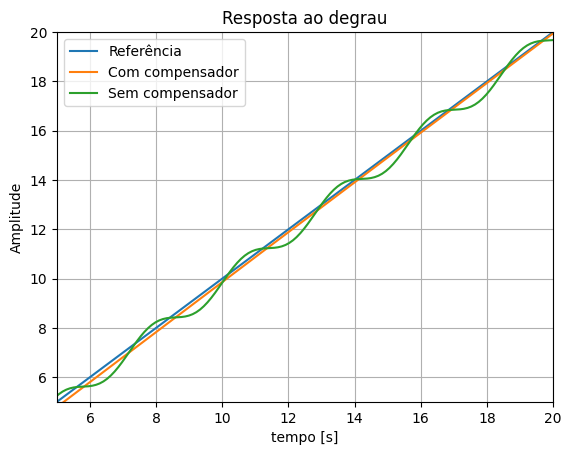

In [4]:


plt.figure(2)
tref, yref = control.step_response(1/s,20)
t,y = control.step_response(1/s*MFcompPID, 20)
t1,y1 = control.step_response(1/s*MFscompP, 20)
plt.plot(tref, yref,t,y,t1,y1)
plt.title('Resposta ao degrau')
plt.legend(["Referência","Com compensador","Sem compensador"])
plt.xlabel('tempo [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.axis([5,20,5,20])

MFscomp(s) = 
     -0.45 s + 1.8
-----------------------
0.35 s^2 + 1.45 s + 3.8

MFcompP(s) = 
          30
----------------------
s^3 + 6 s^2 + 5 s + 30

MFcompPID(s) = 
    -0.07875 s^3 + 0.945 s + 1.26
-------------------------------------
0.2712 s^3 + 1.9 s^2 + 2.945 s + 1.26



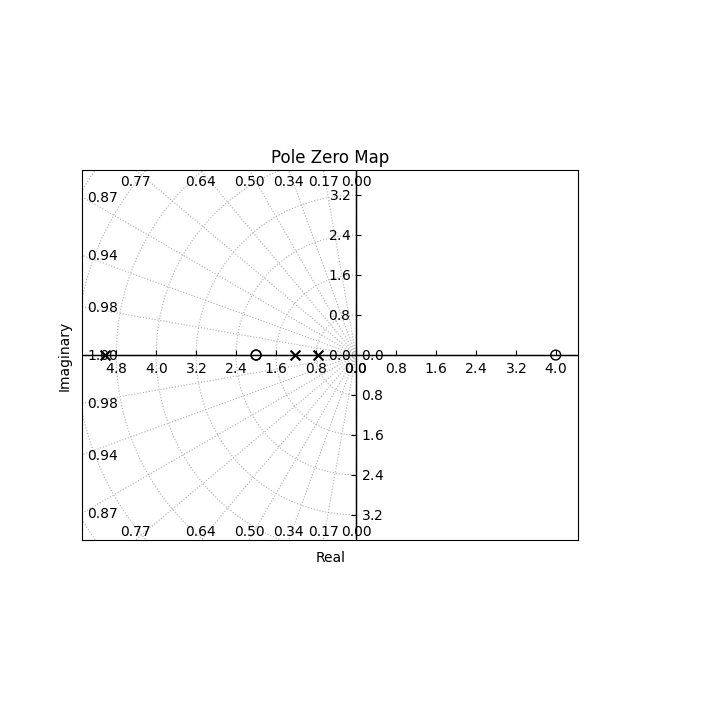

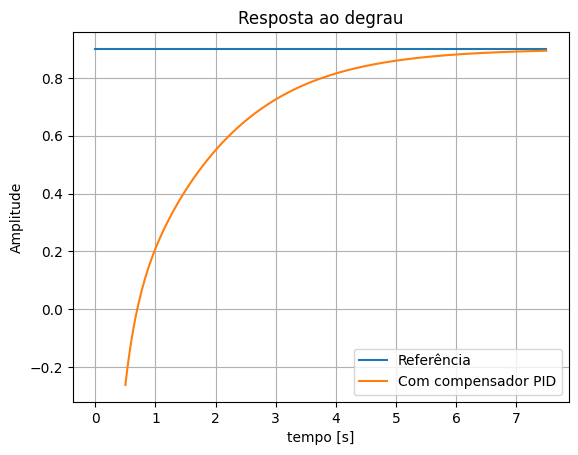

In [5]:
#Ziegler-Nichols para plantas de ordem igual a 1

import matplotlib.pyplot as plt
import numpy as np
import control

s = control.tf('s')

T=0.7
L=0.5

#PID
Kp = 0.5*(T/L)
Ti = 2*L
Td = 0.5*L


Gc = Kp*(1+1/(Ti*s)+Td*s)

#planta
G = (1.8-0.45*s)/(0.35*s**2+1.9*s+2)

#Malha fechada sem o compensador
MFscompP = control.feedback(G)


#Malha Fechada com PID
MFcompPID = control.feedback(G*Gc)

#Funções de transferência
print('MFscomp(s) =',MFscompP)
print('MFcompP(s) =', MFcompP)
print('MFcompPID(s) =', MFcompPID)

#Plano de polos e zeros
plt.figure(1)
control.pzmap(MFcompPID, plot = True, grid = True)

#Resposta ao degrau unitário


plt.figure(2)
tref, yref = control.step_response(s/s*0.9,7.5)
t,y = control.step_response(MFcompPID*0.9, 7)
plt.plot(tref, yref,t+0.5,y)
plt.title('Resposta ao degrau')
plt.legend(["Referência","Com compensador PID"])
plt.xlabel('tempo [s]')
plt.ylabel('Amplitude')
plt.grid(True)
